In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\balam\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
bank_data = pd.read_csv(r"C:\Users\balam\OneDrive\Documents\SOP Docs\Liverpool\Data Science Parts\Data Glacier Assignments\bank-additional-full.csv",delimiter=';')

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# importing IsolationForest using sklearn....
from sklearn.ensemble import IsolationForest

In [10]:
isolation = IsolationForest(contamination='auto',random_state=42)

In [12]:
bank_data_imp = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [13]:
isolation.fit(bank_data[bank_data_imp])

IsolationForest(random_state=42)

In [14]:
bank_data['anamoly_scores'] = isolation.decision_function(bank_data[bank_data_imp])

In [15]:
bank_data['anamoly'] = isolation.predict(bank_data[bank_data_imp])

In [19]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,anamoly_scores,anamoly
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.070170,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.072093,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.109046,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.109675,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.069496,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,-0.138632,-1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,-0.098854,-1
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,-0.105155,-1
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,-0.101145,-1


In [20]:
bank_data.loc[: , ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','anamoly_scores','anamoly'] ]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,anamoly_scores,anamoly
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.070170,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.072093,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.109046,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.109675,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.069496,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.138632,-1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.098854,-1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.105155,-1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.101145,-1


In [31]:
# -1 refers to anomalies 
# +1 refers to outliers....

In [25]:
def outlier_plot(data, outlier_method_name, x_var, y_var, xaxis_limits=[0, 1], yaxis_limits=[0, 1]):
    print(f'Outlier Method: {outlier_method_name}')
    
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['anamoly'] == -1])}")
    print(f"Number of non anomalous values {len(data[data['anamoly'] == 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    g = sns.FacetGrid(data, col='anamoly', height=4, hue='anamoly', hue_order=[1, -1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anamoly'] == -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anamoly'] == 1])} points")
    
    return g


Outlier Method: Isolation Forest
Number of anomalous values 7860
Number of non anomalous values 33328
Total Number of Values: 41188


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


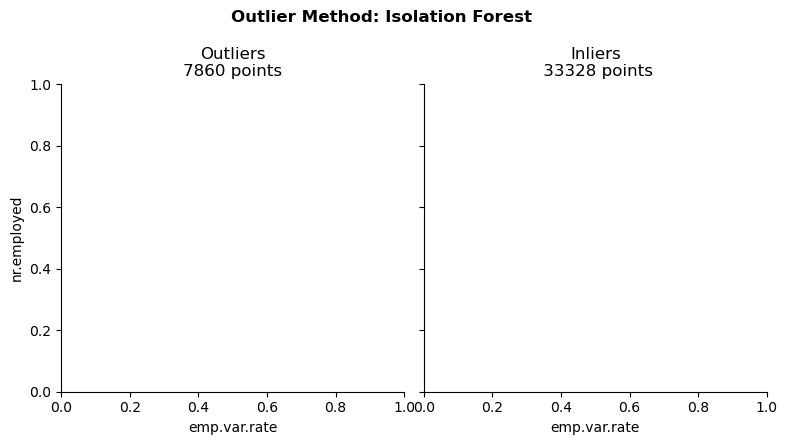

In [30]:
outlier_plot(bank_data,'Isolation Forest','emp.var.rate','nr.employed')
